In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,RocCurveDisplay
import warnings                   
warnings.filterwarnings('ignore')

In [15]:
sa=pd.read_csv("salary.csv")

In [16]:
sa.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [17]:
sa['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
#shape of duplicate records
sa[sa.duplicated()].shape

(24, 15)

In [20]:
#dataset shape before dropping duplicate records
sa.shape

(32561, 15)

In [21]:
#dropping duplicate records
sa.drop_duplicates(inplace=True)

In [22]:
#dataset shape after dropping duplicate records
sa.shape

(32537, 15)

In [23]:
sa.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [24]:
for i in sa.columns:
    print(i,'\n')
    print(sa[i].unique(),'\n')
    print(sa[i].nunique(),'\n')

age 

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

73 

workclass 

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

9 

fnlwgt 

[ 77516  83311 215646 ...  34066  84661 257302] 

21648 

education 

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

16 

education-num 

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

16 

marital-status 

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

7 

occupation 

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-re

# Some Observations

It is observed that extra spaces are appearing everywhere in the dataset (you can see an extra space before first letter of each label in the above output)
It is also observed that ' ?' symbol is appearing in workclass, occupation, and native-country features.
Let's replace the symbol with 'nan' to add appropriate values in later steps.

In [25]:
#1
#first remove all extra spaces in the dataset
sa=sa.applymap(lambda x: x.strip() if isinstance(x,str) else x)
#replace ? with nan
sa.replace('?',np.nan,inplace=True)

In [26]:
#check null values-----sa.isnull().sum()
pd.isna(sa).sum()[pd.isna(sa).sum()>0]

workclass         1836
occupation        1843
native-country     582
dtype: int64

In [27]:
##2 To replace the missing info, it is better to create a new "Unknown Other" label in all the three features

## Let's replace ths missing info  with "Unknown" label in each feature
sa.workclass.fillna(value="UnknCl",inplace=True)
sa.occupation.fillna(value="UnknOc",inplace=True)
sa['native-country'].fillna(value='Unkncntry',inplace=True)

In [28]:
pd.isna(sa).sum()[pd.isna(sa).sum()>0]

Series([], dtype: int64)

In [29]:
#3(lets rename (segregate)some lables in select feature)
## 3. to shorten them for visualisation purpose
sa.replace({'workclass': {'State-gov': 'Govt.', 'Self-emp-not-inc': 'self_emp', 'Federal-gov': 'Govt.', 'Local-gov': 'Govt.', 'Self-emp-inc':'self_emp', 'Without-pay': 'UnknCl', 'Never-worked': 'UnknCl'}}, inplace=True)
sa.replace({'marital-status': {'Married-civ-spouse': 'Married', 'Divorced': 'DASW', 'Married-spouse-absent': 'DASW', 'Separated': 'DASW', 'Married-AF-spouse':'Married', 'Widowed': 'DASW'}}, inplace=True)
sa.replace({'occupation': {'Adm-clerical': 'Adminstration', 'Exec-managerial': 'Executive', 'Handlers-cleaners': 'Handlers', 'Prof-specialty': 'Profsiionals', 'Other-service' : 'UnknOc', 'Craft-repair' : 'Repairing', 'Farming-fishing' : 'Farming', 'Transport-moving':'Transportation', 'Machine-op-inspct': 'MachineOp', 'Protective-serv' : 'ProtectiveServ', 'Priv-house-serv': 'HouseServ'}}, inplace=True)
sa.replace({'native-country': {'United-States': 'USA', 'South': 'SouthKorea', 'Puerto-Rico': 'PuertoRico', 'Dominican-Republic': 'DominicRep', 'Outlying-US(Guam-USVI-etc)':'OutlyingUSA', 'Trinadad&Tobago': 'Tri&Tob', 'Holand-Netherlands': 'Netherlands', 'Hong' : 'HongKong'}}, inplace=True)
sa.replace({'race': {'Asian-Pac-Islander': 'APAC', 'Amer-Indian-Eskimo': 'NatAm'}}, inplace=True)
## df.replace({'salary': {'<=50K': 0, '>50K': 1}}, inplace=True)
sa.replace({'salary':{'<=50K':0,'>50K':1}},inplace=True)

## Checking whether the modification has been made or not
for col in sa.columns:
    if sa[col].dtype=='object':
        print()
        print(col)
        print(sa[col].unique())


workclass
['Govt.' 'self_emp' 'Private' 'UnknCl']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status
['Never-married' 'Married' 'DASW']

occupation
['Adminstration' 'Executive' 'Handlers' 'Profsiionals' 'UnknOc' 'Sales'
 'Repairing' 'Transportation' 'Farming' 'MachineOp' 'Tech-support'
 'ProtectiveServ' 'Armed-Forces' 'HouseServ']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'APAC' 'NatAm' 'Other']

sex
['Male' 'Female']

native-country
['USA' 'Cuba' 'Jamaica' 'India' 'Unkncntry' 'Mexico' 'SouthKorea'
 'PuertoRico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines'
 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos'
 'Taiwan' 'Haiti' 'Portugal' 'DominicRep' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru' 'OutlyingUSA' 'Scotl

In [30]:
sa.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,Govt.,77516,Bachelors,13,Never-married,Adminstration,Not-in-family,White,Male,2174,0,40,USA,0
1,50,self_emp,83311,Bachelors,13,Married,Executive,Husband,White,Male,0,0,13,USA,0
2,38,Private,215646,HS-grad,9,DASW,Handlers,Not-in-family,White,Male,0,0,40,USA,0
3,53,Private,234721,11th,7,Married,Handlers,Husband,Black,Male,0,0,40,USA,0
4,28,Private,338409,Bachelors,13,Married,Profsiionals,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married,Executive,Wife,White,Female,0,0,40,USA,0
6,49,Private,160187,9th,5,DASW,UnknOc,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,self_emp,209642,HS-grad,9,Married,Executive,Husband,White,Male,0,0,45,USA,1
8,31,Private,45781,Masters,14,Never-married,Profsiionals,Not-in-family,White,Female,14084,0,50,USA,1
9,42,Private,159449,Bachelors,13,Married,Executive,Husband,White,Male,5178,0,40,USA,1


In [31]:
sa['native-country'].value_counts()

USA            29153
Mexico           639
Unkncntry        582
Philippines      198
Germany          137
Canada           121
PuertoRico       114
El-Salvador      106
India            100
Cuba              95
England           90
Jamaica           81
SouthKorea        80
China             75
Italy             73
DominicRep        70
Vietnam           67
Japan             62
Guatemala         62
Poland            60
Columbia          59
Taiwan            51
Haiti             44
Iran              43
Portugal          37
Nicaragua         34
Peru              31
France            29
Greece            29
Ecuador           28
Ireland           24
HongKong          20
Cambodia          19
Tri&Tob           19
Laos              18
Thailand          18
Yugoslavia        16
OutlyingUSA       14
Honduras          13
Hungary           13
Scotland          12
Netherlands        1
Name: native-country, dtype: int64

In [32]:
USA=sa[sa['native-country']=='USA']
Non_USA=sa[sa['native-country']!='USA']

In [33]:
#Moreover Native-Country(USA) occurs more 
print(USA.shape)
print(Non_USA.shape)

(29153, 15)
(3384, 15)


In [34]:
## Grouping the features into numerical & categorical 

num_df = sa[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']] 
cat_df = sa[['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']]

In [35]:
num_df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [36]:
cat_df.describe()

,education-num,salary
count,32537.000000,32537.000000
mean,10.081815,0.240926
std,2.571633,0.427652
min,1.000000,0.000000
25%,9.000000,0.000000
50%,10.000000,0.000000
75%,12.000000,0.000000
max,16.000000,1.000000


In [37]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


# Label Enconding

In [38]:
lb=LabelEncoder()
for i in cat_df:
    cat_df[i]=lb.fit_transform(sa[i])

df=pd.concat([num_df,cat_df],axis=1)

In [39]:
df

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,2174,0,40,0,9,12,2,0,1,4,1,38,0
1,50,83311,0,0,13,3,9,12,1,2,0,4,1,38,0
2,38,215646,0,0,40,1,11,8,0,4,1,4,1,38,0
3,53,234721,0,0,40,1,1,6,1,4,0,1,1,38,0
4,28,338409,0,0,40,1,9,12,1,7,5,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,1,7,11,1,11,5,4,0,38,0
32557,40,154374,0,0,40,1,11,8,1,6,0,4,1,38,1
32558,58,151910,0,0,40,1,11,8,0,0,4,4,0,38,0
32559,22,201490,0,0,20,1,11,8,2,0,3,4,1,38,0


In [40]:
sa.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,Govt.,77516,Bachelors,13,Never-married,Adminstration,Not-in-family,White,Male,2174,0,40,USA,0
1,50,self_emp,83311,Bachelors,13,Married,Executive,Husband,White,Male,0,0,13,USA,0
2,38,Private,215646,HS-grad,9,DASW,Handlers,Not-in-family,White,Male,0,0,40,USA,0
3,53,Private,234721,11th,7,Married,Handlers,Husband,Black,Male,0,0,40,USA,0
4,28,Private,338409,Bachelors,13,Married,Profsiionals,Wife,Black,Female,0,0,40,Cuba,0


In [41]:
# So first we'll have a glance at skewness of features before proceeding with scaling
df.skew(axis=0).sort_values(ascending=False)

capital-gain      11.949403
capital-loss       4.592702
fnlwgt             1.447703
salary             1.211687
workclass          1.119585
relationship       0.786548
age                0.557663
hours-per-week     0.228759
marital-status    -0.180490
occupation        -0.265649
education-num     -0.309500
sex               -0.719449
education         -0.934160
race              -2.216964
native-country    -4.156220
dtype: float64

In [42]:
# Now we check the corrleation of features with the target variable (salary)
corr_matrix = df.corr()
corr_matrix['salary'].sort_values(ascending=False)

salary            1.000000
education-num     0.335272
age               0.234037
hours-per-week    0.229658
capital-gain      0.223336
sex               0.215969
capital-loss      0.150501
education         0.079366
race              0.072093
workclass         0.034842
native-country    0.023585
fnlwgt           -0.009502
occupation       -0.098072
marital-status   -0.106078
relationship     -0.250948
Name: salary, dtype: float64

In [43]:
## Segregating the Dependent Variable in Y-axis and Independent Variables in X-axis
## And removing the features that are considered insignificant

X = df.drop(columns=["salary", "fnlwgt", "education", "race", "workclass", "native-country", "occupation", "marital-status"])
y = df["salary"]

In [44]:
X.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,relationship,sex
0,39,2174,0,40,12,1,1
1,50,0,0,13,12,0,1
2,38,0,0,40,8,1,1
3,53,0,0,40,6,0,1
4,28,0,0,40,12,5,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((26029, 7), (6508, 7), (26029,), (6508,))

In [47]:
std_col=['sex','relationship','hours-per-week','age','education-num']
min_max_col=['capital-gain','capital-loss']

In [48]:
from sklearn.compose import ColumnTransformer
num_pip=Pipeline(
steps=[
    ('scaler',StandardScaler()),
])

num2_pip=Pipeline(
steps=[
    ('min_max_scal',MinMaxScaler())
])

preprocessor=ColumnTransformer([
    ('num_pip',num_pip,std_col),
    ('cat_pip',num2_pip,min_max_col)
],remainder='passthrough')

In [49]:
X_train

,age,capital-gain,capital-loss,hours-per-week,education-num,relationship,sex
27637,39,0,0,40,11,0,1
18823,33,2176,0,35,3,1,1
21940,34,0,0,40,8,0,1
7881,22,0,0,40,9,1,0
4891,21,0,0,35,9,1,0
...,...,...,...,...,...,...,...
13128,42,5178,0,40,12,0,1
19657,49,0,0,40,8,1,1
9848,59,0,0,40,5,2,0
10802,52,0,0,40,9,0,1


In [50]:
X_train=preprocessor.fit_transform(X_train)

In [51]:
X_train

array([[ 0.70165333, -0.90058336, -0.0371707 , ...,  0.74583591,
         0.        ,  0.        ],
       [ 0.70165333, -0.27779093, -0.44444309, ..., -2.36683877,
         0.02176022,  0.        ],
       [ 0.70165333, -0.90058336, -0.0371707 , ..., -0.4214171 ,
         0.        ,  0.        ],
       ...,
       [-1.42520524,  0.3450015 , -0.0371707 , ..., -1.5886701 ,
         0.        ,  0.        ],
       [ 0.70165333, -0.90058336, -0.0371707 , ..., -0.03233276,
         0.        ,  0.        ],
       [ 0.70165333, -0.27779093,  0.61446511, ..., -0.03233276,
         0.02597026,  0.        ]])

In [52]:
X_test=preprocessor.transform(X_test)

In [53]:
X_test

array([[ 0.70165333, -0.90058336, -0.0371707 , ..., -0.03233276,
         0.        ,  0.        ],
       [ 0.70165333, -0.27779093,  0.37010168, ..., -0.4214171 ,
         0.        ,  0.        ],
       [ 0.70165333, -0.90058336,  0.37010168, ..., -0.4214171 ,
         0.        ,  0.45385675],
       ...,
       [ 0.70165333,  0.3450015 , -0.0371707 , ..., -0.4214171 ,
         0.        ,  0.        ],
       [-1.42520524,  0.3450015 , -0.0371707 , ..., -0.4214171 ,
         0.        ,  0.        ],
       [-1.42520524,  1.59058637, -0.52589757, ..., -0.4214171 ,
         0.        ,  0.        ]])

In [54]:
#compute mulitiple models by using function
Model = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ] 



log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print(f'\033[94m-'*30, '\n')
    print(name)
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print(f'\033[94m-'*30)

------------------------------ 

LogisticRegression
Accuracy: 82.08359%
Log Loss: 0.40208
------------------------------ 

DecisionTreeClassifier
Accuracy: 82.57529%
Log Loss: 3.4138
------------------------------ 

RandomForestClassifier
Accuracy: 84.29625%
Log Loss: 0.59634
------------------------------


In [55]:
mdl =RandomForestClassifier()
mdl.fit(X_train, y_train)
y_pred=mdl.predict(X_test)
acc_rf = round(mdl.score(X_test, y_test) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 84 % 



# Confusion Matrix

Confusion Matrix in Numbers
[[4486  400]
 [ 625  997]]


 Confusion Matrix in Percentage
[[0.92 0.08]
 [0.39 0.61]]



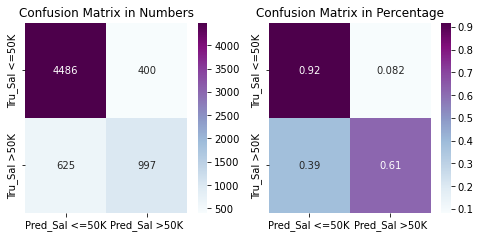

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('\n', 'Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['Tru_Sal <=50K', 'Tru_Sal >50K']
predicted_class_names = ['Pred_Sal <=50K', 'Pred_Sal >50K']

main_df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

main_df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.subplots(figsize = (8,3.5))

plt.subplot(1,2,1)
plt.title("Confusion Matrix in Numbers", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix, cmap='BuPu', annot=True, fmt='d')

plt.subplot(1,2,2)
plt.title("Confusion Matrix in Percentage", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix_percent, cmap='BuPu', annot=True)

plt.show()


# Classification Report

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4886
           1       0.71      0.61      0.66      1622

    accuracy                           0.84      6508
   macro avg       0.80      0.77      0.78      6508
weighted avg       0.84      0.84      0.84      6508



# RocCurveDisplay

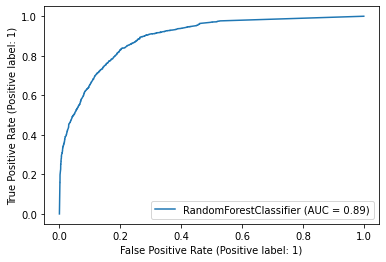

In [58]:
roc_disp = RocCurveDisplay.from_estimator(mdl, X_test, y_test)